> # Chapter 7. Visualization
---
- ### Categorical Distributions
- ### Numerical Distributions
- ### Overlaid Graphs


In [1]:
# HIDDEN
from datascience import *
import matplotlib
#matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
#np.set_printoptions(threshold=50)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


> 시각화 필요성
---
+ Table은 유용한 도구이지만 데이터 크기가 클 경우 적절한 시각화 도구가 필요하다.


> 데이터셋 : actors.csv
---

+ 다음 웹사이트 및 관련 데이터를 사용해 보자.
 - [Internet Movie Database (IMDB)](http://www.imdb.com/)
 - Box Office Mojo(https://www.boxofficemojo.com/)
 - The numbers(https://www.the-numbers.com/)
 
+ 배우 정보를 읽어들이자. (50명) 

In [3]:
actors = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp20/master/lec/actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


- column 정보

|Column |Contents|
|---|---|
| Actor  | Name of actor | 
|  Total Gross  | Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies | 
|  Number of Movies  | The number of movies the actor has been in | 
|  Average per Movie |  Total gross divided by number of movies  | 
|  #1 Movie |  The highest grossing movie the actor has been in | 
|  Gross |   Gross domestic box office receipt, in millions of dollars, of the actor’s  #1 Movie  | 




## Scatter Plot
---

+ Scatter plot(산점도)는 두 수치변수 사이의 분포를 설명한다. 


+ Table의 scatter method를 사용해 보자.

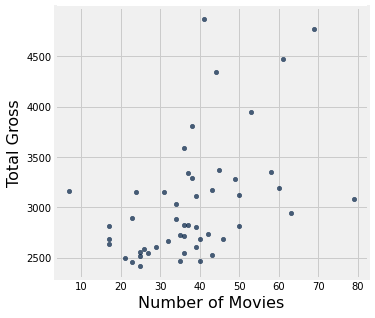

In [4]:
actors.scatter('Number of Movies', 'Total Gross')

> 관찰
---
+ 두 변수 사이에 양의 상관관계가 있다.
+ 그러나 출연편수가 가장 높은 배우들의 Total gross가 최대는 아니다.
 - 전반적인 양의 상관관계가 있다.



+ 다른 변수에 대해서 살펴보자.

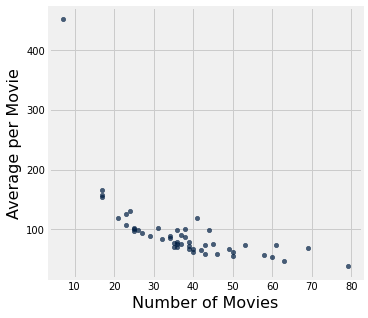

In [5]:
actors.scatter('Number of Movies', 'Average per Movie')

> 관찰
---
+ 두 변수 사이에 __음__의 상관관계가 있다.
 - 즉, 출연편수가 많을수록 편당매출액은 줄어든다.

+ Outlier를 제거해 보자.

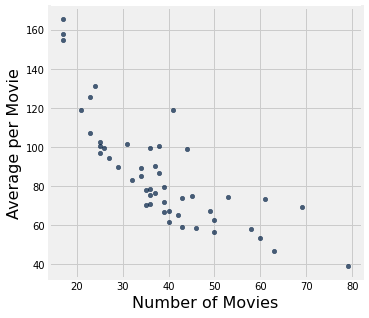

In [6]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [7]:
actors.where('Number of Movies', are.above(60))


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


> 분석
---
+ 편당매출액('Average per Movie') 변수가 의미있는 정보이지만 배우의 가치를 모두 설명하지는 않는다.


+ 장르나 역할 등 다른 변수가 고려되어야 한다.


+ 실제로 편당매출액이 가장 높은 배우를 조사해 보자.

In [8]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


> Star Wars에서 Anthony Daniels 역할은?

See [C-3PO](https://en.wikipedia.org/wiki/C-3PO)


다시 한 번 분석에서 변수의 의미를 정의하는 데 주의해야함을 상기하자.


> ## Line Graphs
---
+ Line 그래프는 어떤 순서(특히, 시간)에 따른 경향을 살피는 데 유용하다.


+ 연도별 영화매출 데이터를 이용해 보자.

In [10]:
movies_by_year = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


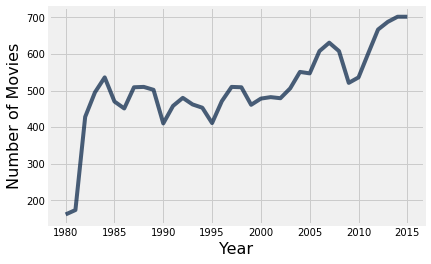

In [11]:
movies_by_year.plot('Year', 'Number of Movies')
#movies_by_year.plot('Year')

+ 1980년대 초반 급격한 증가


+ 2000년대를 중심으로 분석해 보자. 

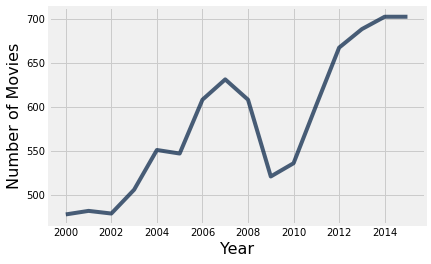

In [12]:
century_21 = movies_by_year.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

+ 2008년 금융위기로 제작편수가 일시적으로 급감했다.


+ 반면, 영화매출액을 살펴보자.

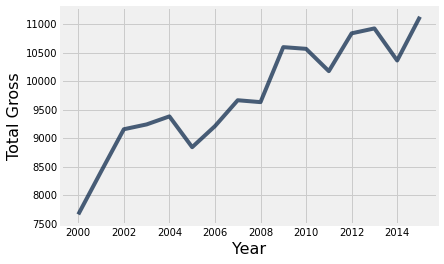

In [13]:
century_21.plot('Year', 'Total Gross')

> 관찰결과
---
+ 2008년대비 2009년 제작편수는 급감
 - 금융위기가 원인
 
 
+ 그러나 영화매출액은 2009년 오히려 증가
 - 경제불황시 오히려 고통을 잊기 위해 영화를 더 보는 경향 ([참고문헌](https://www.nytimes.com/2009/03/01/movies/01films.html?_r=0))
 

+ 또 다른 이유는
 - 아바타 상영

In [0]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


> ## Bar Chart
---
+ Categorical 변수의 분포를 표현하는 데 유용한 시각화 방법이다.

> Visualizing Categorical Distributions
---
+ 변수가 수치(numerical)가 아닌 경우 역시 많다.


+ 범주(category)형 변수가 대표적이며 다음 예를 보자.
 - 아이스크림의 향
 - 농구팀 명
 - 영화장르
 - 여론조사시 "만족", "보통", "불만족"

> 다음 임시데이터를 생성해 보자.

In [14]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


- 이를 분포표(distribution table)이라 한다.


- 즉, 분포(distribution)란 변수의 값에 따른 frequency이다.

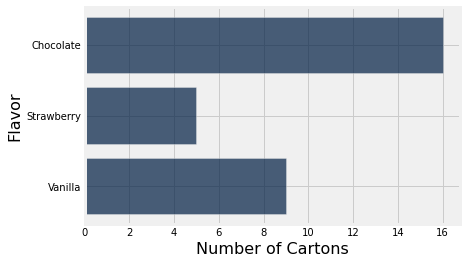

In [15]:
icecream.barh('Flavor', 'Number of Cartons')

icecream과 같이 category와 frequency 두 column으로 구성된 Table일 경우 frequency argument는 생략할 수 있다.

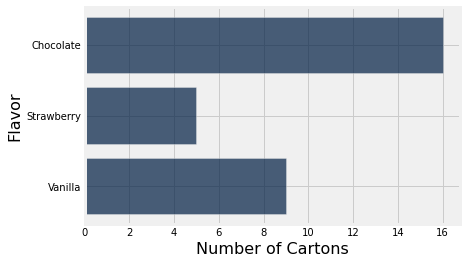

In [16]:
icecream.barh('Flavor')

> Note 
---
+ Scatter, Line graphs : 두 numerical variables 사이의 관계를 시각화


+ Bar graphs : 한 축이 categorical variable
 - 따라서 bar의 두께나 category value의 순서가 의미 없을 수도 있다. (__nominal 변수__)
 
 
+ 앞의 예제에서 frequency에 의해 정렬해 보자.
 

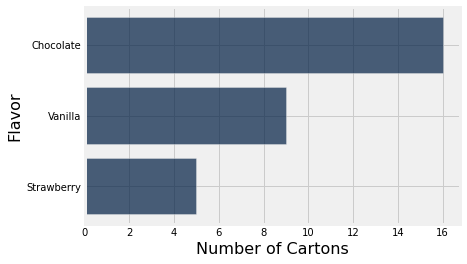

In [17]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')


> ### Grouping Categorical Data
---
+ Frequency가 없는 데이터를 처리해 보자.


+ 최고 흥행 Top200 영화에 대한 데이터이다.

In [20]:
top = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


Studio별 몇 편의 영화가 포함되었는지를 살펴보자.

In [21]:
movies_and_studios = top.select('Title', 'Studio')
movies_and_studios.group('Studio')

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


+ Studio 변수의 distribution 결과를 얻게 된다.


+ Bar graph로 나타내 보자.


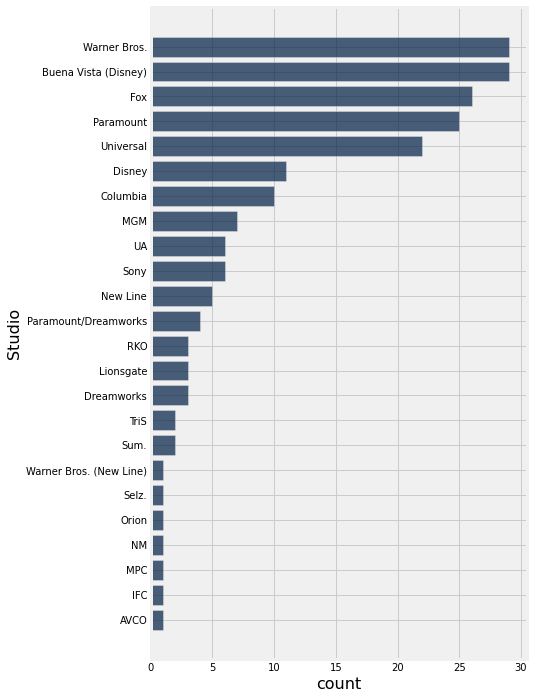

In [22]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution.sort('count', descending=True).barh('Studio')

+ Year변수에 의한 분포를 조사해보자.

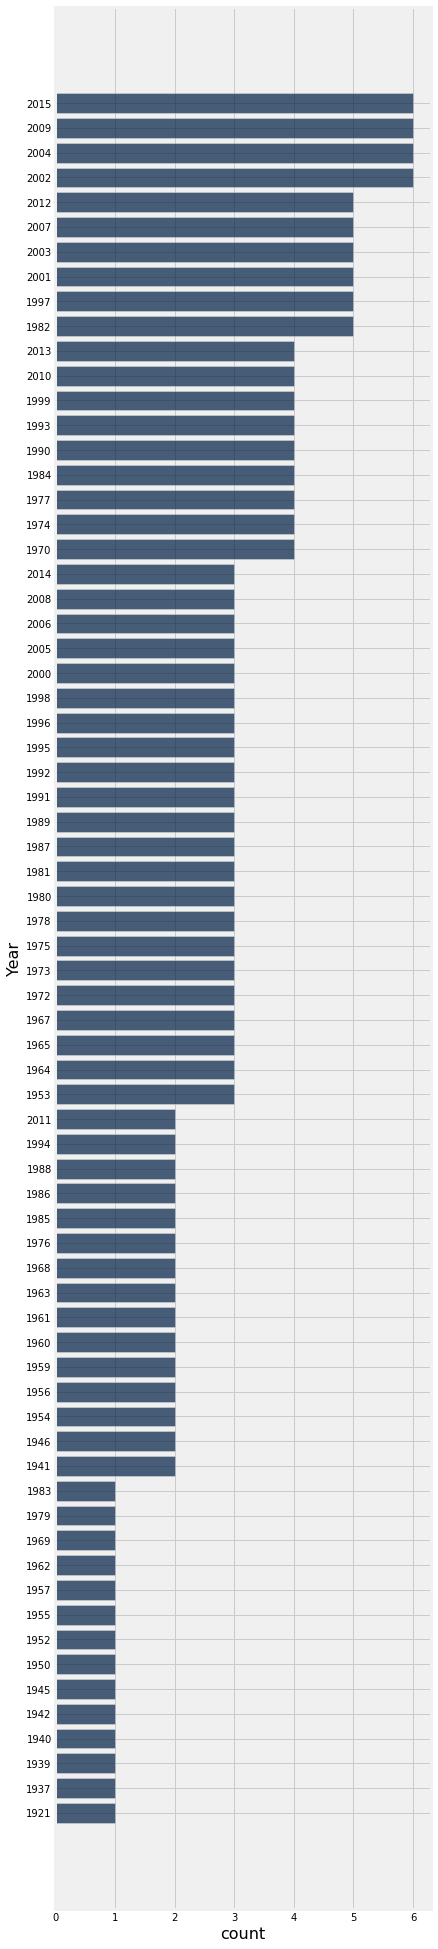

In [23]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').sort('count', descending=True).barh('Year')

+ 그러나 Year변수는 numerical 변수이므로 값 자체에 의미를 가지고 있다.


+ 따라서 Year 증가함에 따른 분포도 의미가 있다.

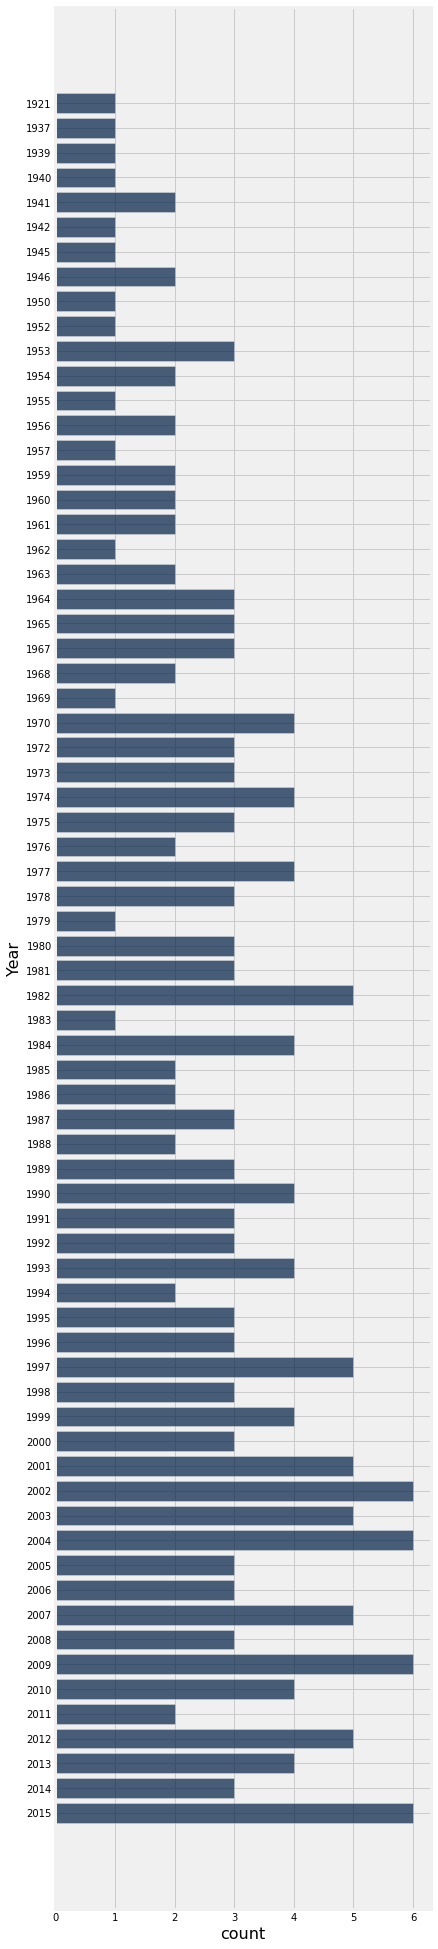

In [24]:
movies_and_years.group('Year').barh('Year')

+ sort없이 bar graph를 그리는 경우 categorical variable 값에 의해 정렬된다.


+ 하지만 bar graph에서 Year는 categorical 변수로 다뤄졌으므로 실제 값의 의미가 완전히 반영되지는 않았다.
 - 예) 1921년과 1937년 사이가 표현되지 못한다.
 

> ## Histogram
---
+ Histogram은 numerical variable의 distribution을 조사하는 데 유용한 방법이다.

> ### Visualizing Numerical Distributions
---
+ Numerical 변수의 경우 산술식이 의미가 있다.


+ 하지만 Category 변수가 코드화 된 경우와 구분된다.
 - Total:0, Male:1, Female:2

In [0]:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


+ Adjusted Gross는 2016년 티켓가격으로 환산된 수치이다.


+ Adjusted Gross에 관해 distribution을 분석해 보자.

In [0]:
millions = top.select(0).with_column('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions


Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


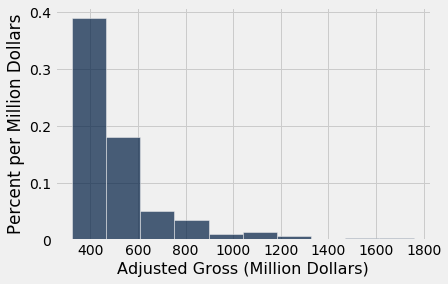

In [0]:
millions.hist('Adjusted Gross', unit="Million Dollars")


> 용어
---
+ Bin : grouping한 범위(intervals)
 - 앞의 예는 10개의 bin으로 구성되었다.

+ Endpoint convention
 - left endpoint : inclusive
 - rigth endpoint : exclusive
 - 즉 bin은 [a,b)로 표현될 수 있다.


+ 맨 왼쪽 혹은 맨 오른쪽 bin은 적절하게 조정될 수 있다.
 - 예) AGE=100는 100이상을 의미
 

+ bin을 직접 정의할 수 있다.

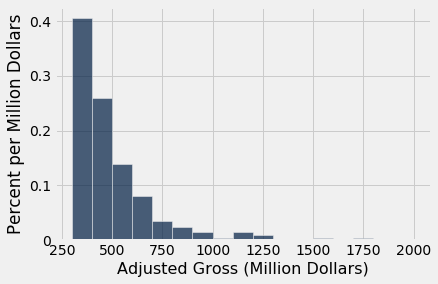

In [0]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

> Counts in the Bins
---
+ Category variable에 대해 group()처럼
+ Numerical varible에 대해 bin()을 사용


+ Note: 생성되는 Column 차이 

In [0]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

bin,Adjusted Gross count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


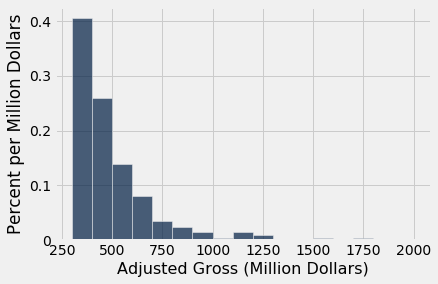

In [0]:
bin_counts.hist('Adjusted Gross count', bin_column='bin', unit='Million Dollars')

> ### The Vertical Axis: Density Scale
---
+ 수직축에 대한 내용을 이해해 보자.


+ 각 bin의 높이(height)는 다음과 같이 계산된다.
$$ height = \frac{percent}{width}$$
 - 이 때 percent는 전체 elements 중 해당 bin에 포함된 elements의 백분율이다.
 - 그리고 width는 해당 bin의 너비이다.
 

In [0]:
counts = bin_counts.relabeled('Adjusted Gross count', 'Count')
percents = counts.with_column(
    'Percent', (counts.column('Count')/200)*100
    )
heights = percents.with_column(
    'Height', percents.column('Percent')/100
    )
heights

bin,Count,Percent,Height
300,81,40.5,0.405
400,52,26,0.26
500,28,14,0.14
600,16,8,0.08
700,7,3.5,0.035
800,5,2.5,0.025
900,3,1.5,0.015
1000,1,0.5,0.005
1100,3,1.5,0.015
1200,2,1,0.01


+ 첫 번째 bin의 예를 들면
 - Percent : 전체 200개 영화 중 81개이므로 40.5%
 - Width : [300,400)이므로 너비는 100
 - 따라서 height는 $\frac{40.5}{100}=0.405$이다.


+ __Units__
 - 0.405 수치의 스케일 단위는 0.405% per million dollars 이다.
 - 이런 정의에 의해 height는 단순히 percent가 아니라 밀도에 의한 비중 (density-scaled percent)이다.
 - 이 의미를 다음 unequal bins에 의한 histogram을 통해 알아보자.

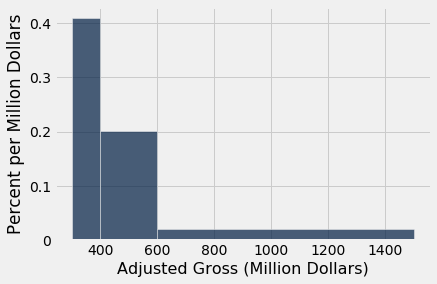

In [0]:
uneven = make_array(300, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars", density=True) # 현재 matplotlib version이 추천하는 형태

In [0]:
millions.bin('Adjusted Gross', bins=uneven)

bin,Adjusted Gross count
300,81
400,80
600,37
1500,0


+ 두 bin [300,400)과 [400,600)을 비교해 보자. 


+ 두 bin의 percent는 거의 똑같다.


+ 하지만 첫 번째 bin의 width는 100, 두 번째 bin의 width는 200이다.


+ 따라서 첫 번째 bin의 density가 2배 크며 histogram의 height 역시 2배정도 높다.


+ 만약 이러한 density-scale height 대신 percent-scale height를 사용한 histogram을 그릴 수도 있다. ('normed' argument)


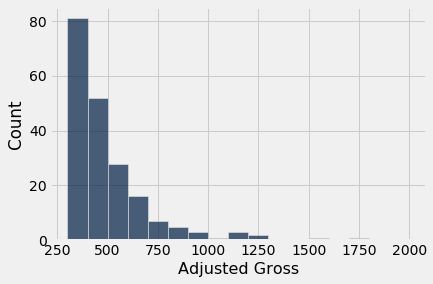

In [0]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), density=False)

+ equal width 경우 결과가 동일한 모습이지만 수직축이 count값이다.


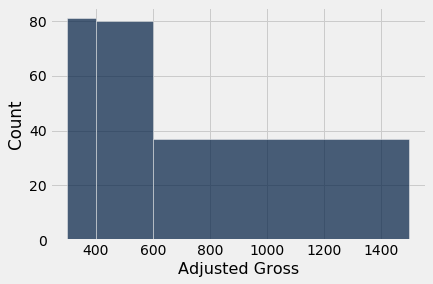

In [0]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)

+ unequal width 경우 결과가 달라진다.


+ 비록 hist() method를 이용했지만 이 결과를 histogram이라 부르지 않는다.
 - histogram은 반드시 width의 차이가 반영되어야 한다. (density-scale)

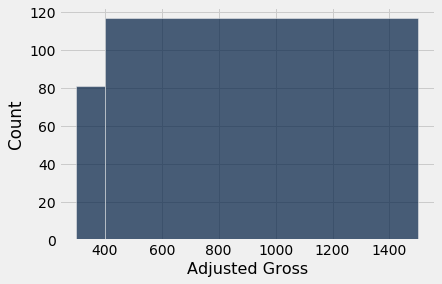

In [0]:
very_uneven = make_array(300, 400, 1500)
millions.hist('Adjusted Gross', bins=very_uneven, normed=False)

+ 더 극단적인 example이다.


+ distribution의 의미가 완전히 사라진다.

> Notes on Histogram
---
+ Bin은 수평축에서 값에 비례하는 width를 가지며 연속적으로 그려진다.


+ 각 bar의 __면적(area)__ 해당 bin에 속하는 elements의 percent이다. 즉,
$$ \text{area of bar} = height \times width = \text{percent of entries in bin} $$


+ 따라서 
$$ \text{total area} = 100% $$


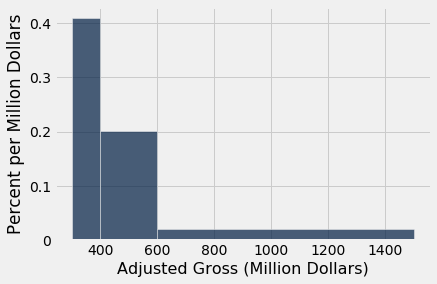

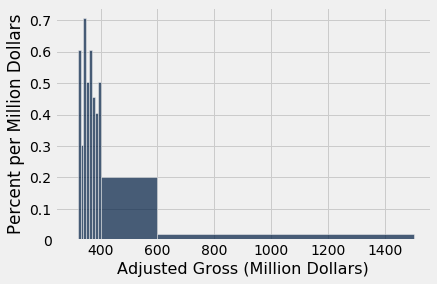

In [0]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

some_tiny_bins = make_array(300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')


+ 아래 histogram은 [300,400) bin을 더욱 세밀한 구간으로 나눠 조사한 것이다.


+ Flat top = rough approximation
 - 해당 구간의 평균을 나타낸다. 


+ 결국 정보의 손실이 있음을 기억하자.


+ 어떤 width를 가지는 bin을 만드느냐에 따라 해석이 달라질 수 있다.

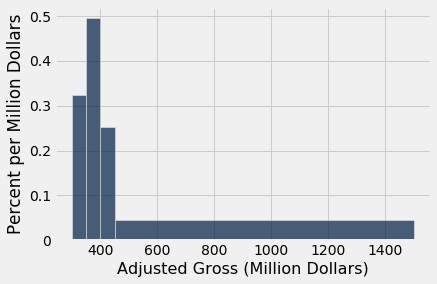

In [0]:
uneven_again = make_array(300, 350, 400, 450, 1500)
millions.hist('Adjusted Gross', bins=uneven_again, unit='Million Dollars')


In [0]:
millions.bin('Adjusted Gross', bins=uneven_again)


bin,Adjusted Gross count
300,32
350,49
400,25
450,92
1500,0


두 bin [400, 450)과 [450, 1500)을 비교해 보자.

Q) 어떤 구간에 더 많은 영화가 포함되는가?

A) [450, 1500)

Q)그런데 왜 [450, 1500) 높이가 더 낮은가?

A) height는 density를 표현하며 area가 count를 표현한다.

> ### Differences Between Bar Charts and Histograms
---
+ Bar charts display one quantity per category. They are often used to display the distributions of categorical variables. Histograms display the distributions of quantitative variables.


+ All the bars in a bar chart have the same width, and there is an equal amount of space between consecutive bars. The bars of a histogram can have different widths, and they are contiguous.


+ The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the value for each category. The heights of bars in a histogram measure densities; the areas of bars in a histogram are proportional to the numbers of entries in the bins.


> ## Overlaid Graphs
---
- 비교를 위해 2개 이상의 그래프를 겹칠 수 있다.


- scale이나 unit의 해석에 일관성이 유지되어야 한다.


- 앞서 공부한 scatter(), plot(), barh() 등을 이용한다.


- 일반적인 호출 형태는 다음과 같다.

     name_of_table.method(column_label_of_common_axis, array_of_labels_of_variables_to_plot) 


> ### Scatter plots
---
+ Franics Galton (영국 우생학자)이 사용했던 부모와 자식의 키에 관한 데이터를 사용해 보자.

In [0]:
# 전체 데이터 중 첫 번째 자식에 데이터만 활용
heights = Table.read_table('galton.csv').where('childNum', 1).select('father','mother','childHeight')
heights

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


father,mother,childHeight
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,69.5
74,68,76.5
74,66.5,70.5
74.5,66,66
74,65.5,65.5


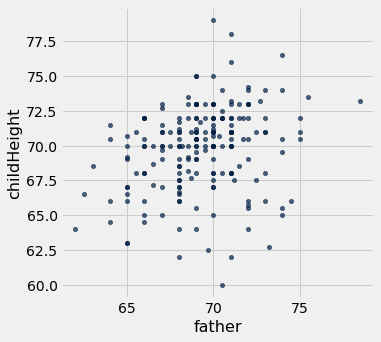

In [0]:
heights.scatter('father', 'childHeight') # recall

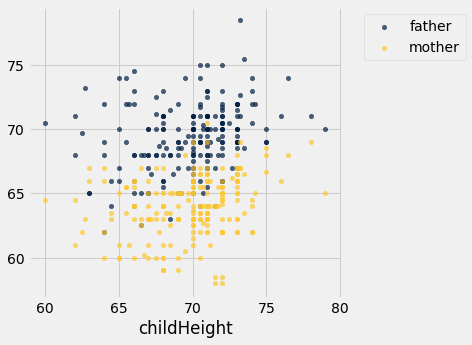

In [0]:
heights.scatter('childHeight')

+ 전체적으로 father의 키, mother의 키 각각이 자식의 키와 상관성이 있다.


+ father 키가 전반적으로 mother 키보다 높게 형성된다.


> Line Graphs
---
+ 미국인구 데이터를 사용해 보자.

In [0]:
# Read the full Census table
full_census_table = Table.read_table('nc-est2015-agesex-res.csv')

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select(['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014'])
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


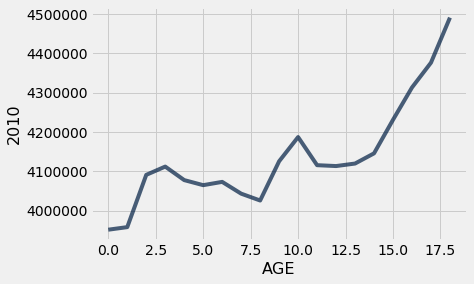

In [0]:
children.plot('AGE','2010') # recall

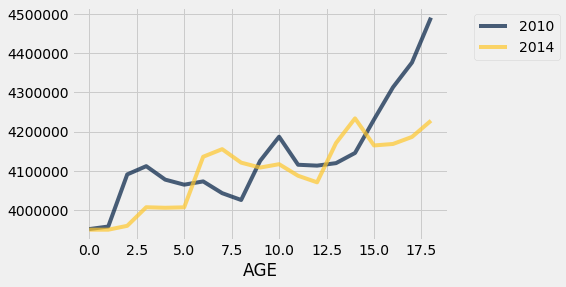

In [0]:
children.plot('AGE')

+ 비슷한 패턴이 있음을 알 수 있다.


+ 4년의 차이가 있음을 알 수 있다.
 - 예) 2010년 10세는 2014년 14세
 
 
+ 4년후 인구가 조금 더 증가했다.
 - 이민 등 외부유입

> ###  Bar Charts
---
+ 미국 인종에 관한 데이터를 이용해 보자.

In [0]:
usa_ca = Table.read_table('usa_ca_2014.csv')
usa_ca

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


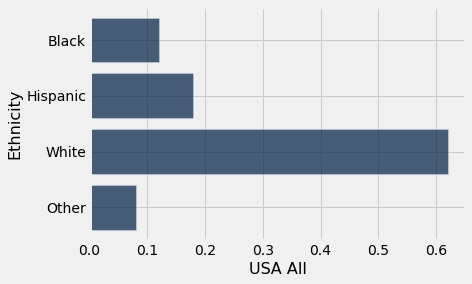

In [0]:
usa_ca.barh('Ethnicity', 'USA All') # recall

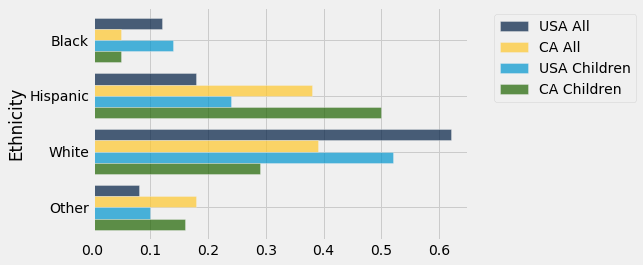

In [0]:
usa_ca.barh('Ethnicity')

'USA All'과 'CA All'만 비교해보자.

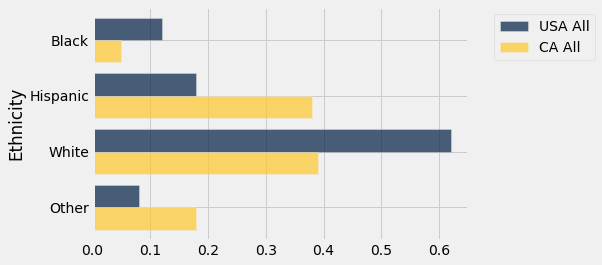

In [0]:
usa_ca.select('Ethnicity', 'USA All', 'CA All').barh('Ethnicity')

+ CA의 지역적 특징으로 Hispanic, Asian이 매우 높다.


+ CA의 어린이 비율을 살펴보자.

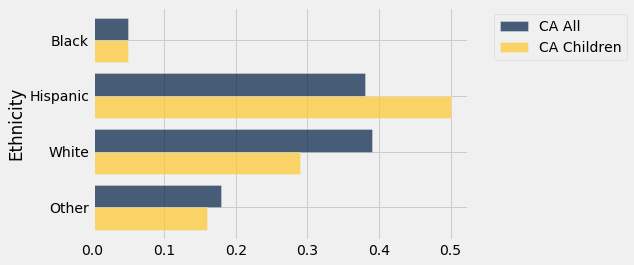

In [0]:
usa_ca.select('Ethnicity', 'CA All', 'CA Children').barh('Ethnicity')

+ 향후 Hispanic이 비율이 매우 높아질 것을 예상할 수 있다.

> ### RECAP
---

+ Visualization  

+ Relation between numerical variables
 
 - Scatter  
   * Table의 scatter() method
   
 - Line graphs
   * Table의 plot() method


+ Distributions of categorical variables
 
 - Bar Chart
   * Table의 barh() method
 
 - Grouping을 통한 frequncy count
   * Table의 group() method
   
   
+ Distributions of numerical variables

 - Histogram
   * Table의 hist() method
 - Bin count (frequency)
   * Table의 bin() method

+ Overlaid graphs
 - 기존 scatter(), plot(), barh()을 활용
 - 공통 variable을 argument로 활용